<font size=7> Latencies Analysis

In [2]:
import pickle
from human_hip.spike_data import curate_latencies, plot_raster_latency_pairs, plot_vector_layout, plot_latency_dist_hist, plot_latency_angle_hist, \
                                 plot_cross_sttc_pairs
from human_hip.animate import animate_latencies
import human_hip.spike_data as spike_data

In [3]:
sd = spike_data.read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )


In [4]:
#good_pairs = curate_latencies(sd)
# good_pairs = curate_latencies(sd)
# with open( 'curate_latencies_good_pairs.pkl' , 'wb') as my_file:
#    pickle.dump(good_pairs, my_file)
#load pickled data
with open( 'curate_latencies_good_pairs.pkl' , 'rb') as my_file:
    good_pairs = pickle.load(my_file)
print(len(good_pairs))

466


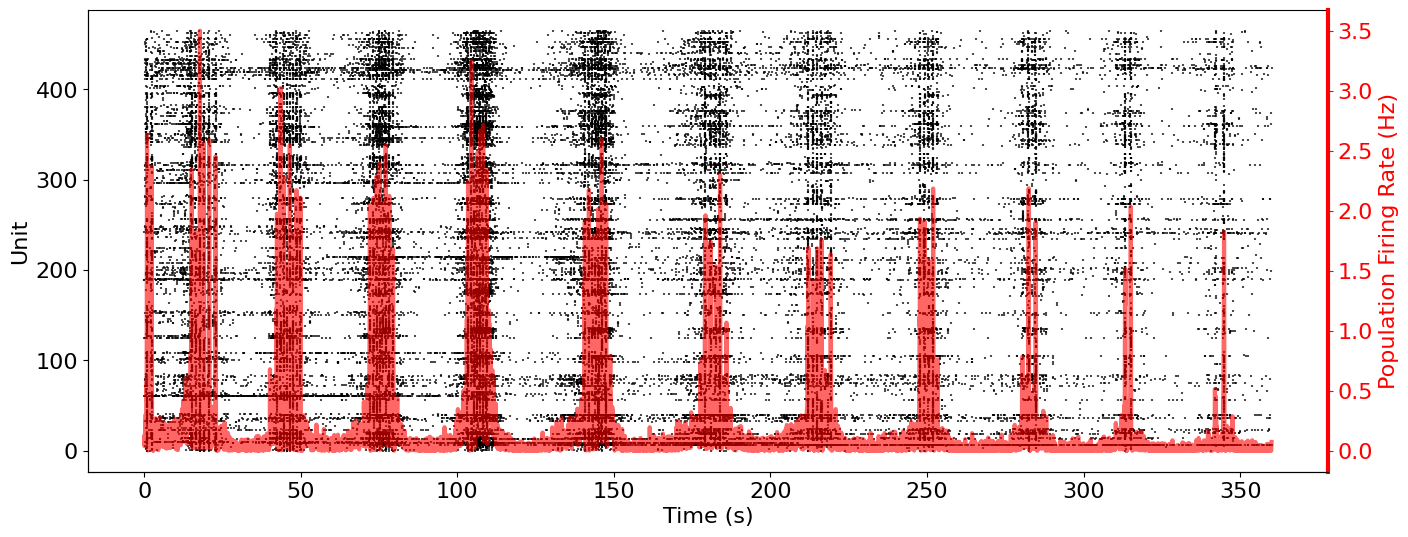

In [5]:
plot_raster_latency_pairs( sd, good_pairs )

In [19]:
plot_raster_latency_pairs

<function human_hip.spike_data.plot_latencies.plot_raster_latency_pairs(sd, pairs, xlim=None)>

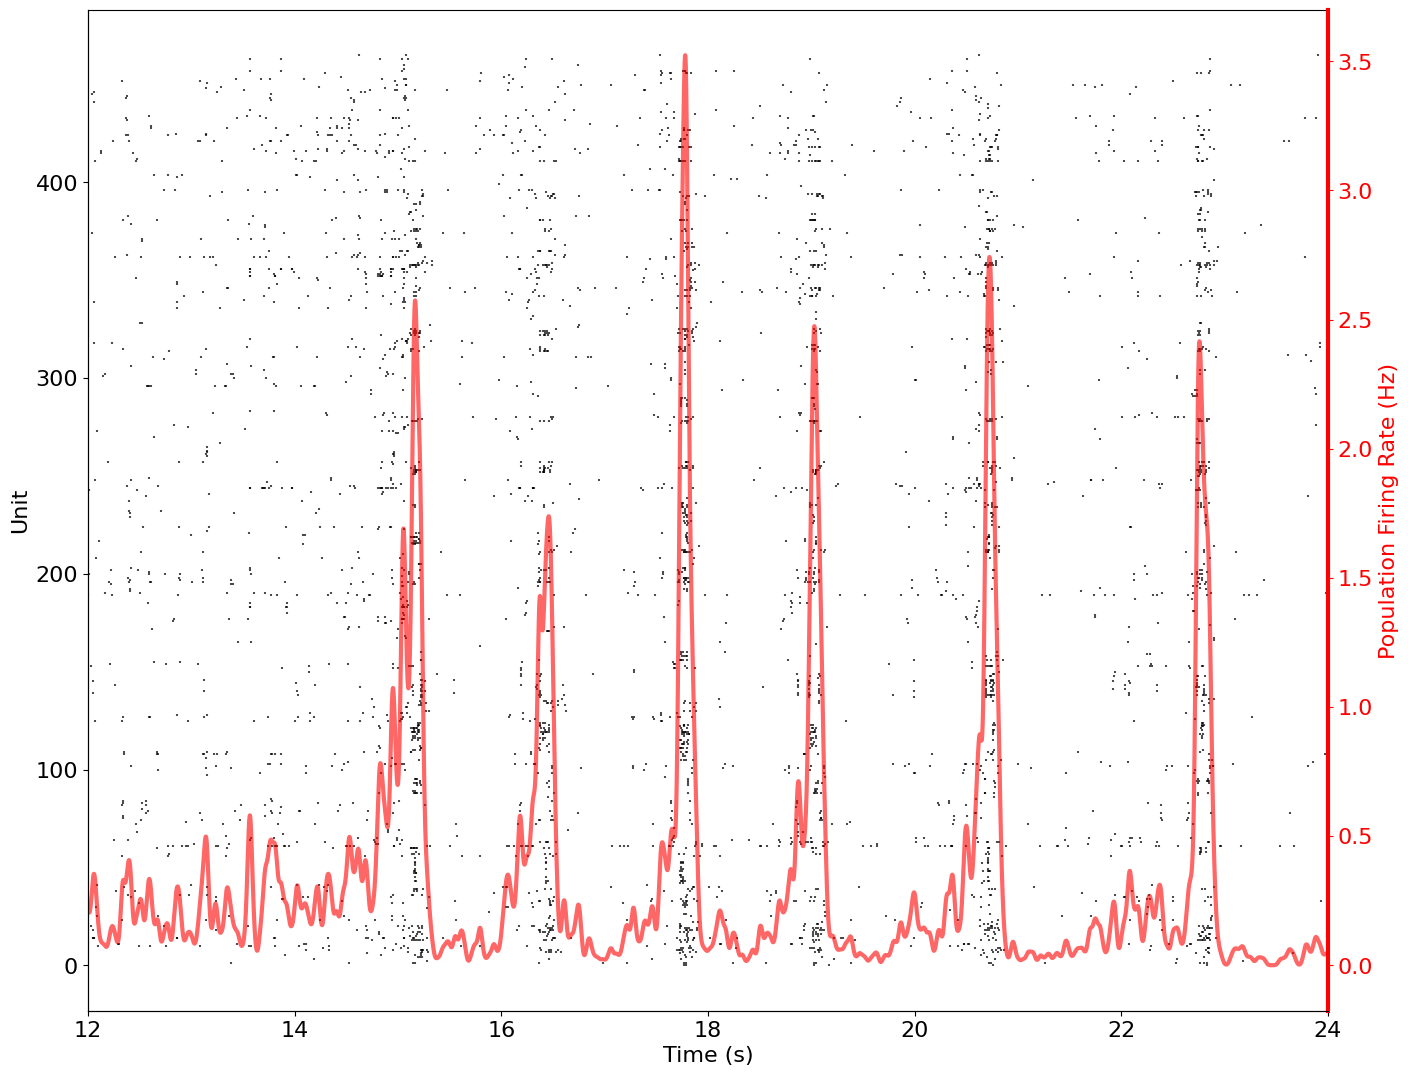

In [23]:
plot_raster_latency_pairs( sd, good_pairs, xlim=(12,24), size=(16,13) )

540 um -- average pair distance
549 um -- average latency distance


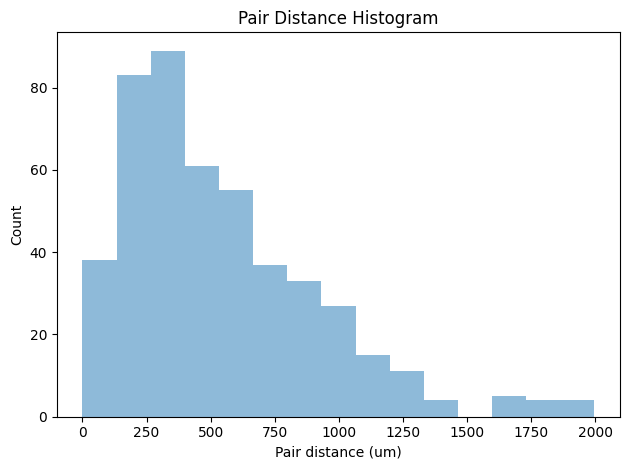

In [8]:
plot_latency_dist_hist(sd, good_pairs)

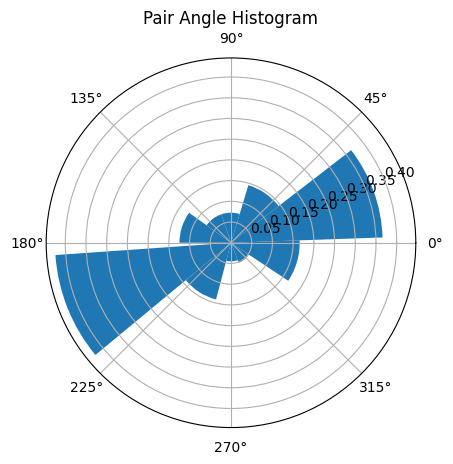

In [7]:
plot_latency_angle_hist( sd, good_pairs)

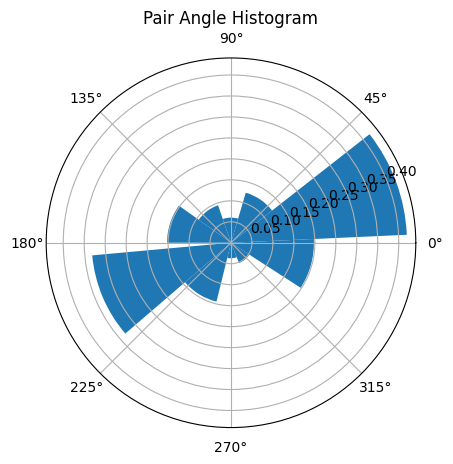

In [12]:
plot_latency_angle_hist( sd, good_pairs, by_firing_rate=True)

# Vector Plots

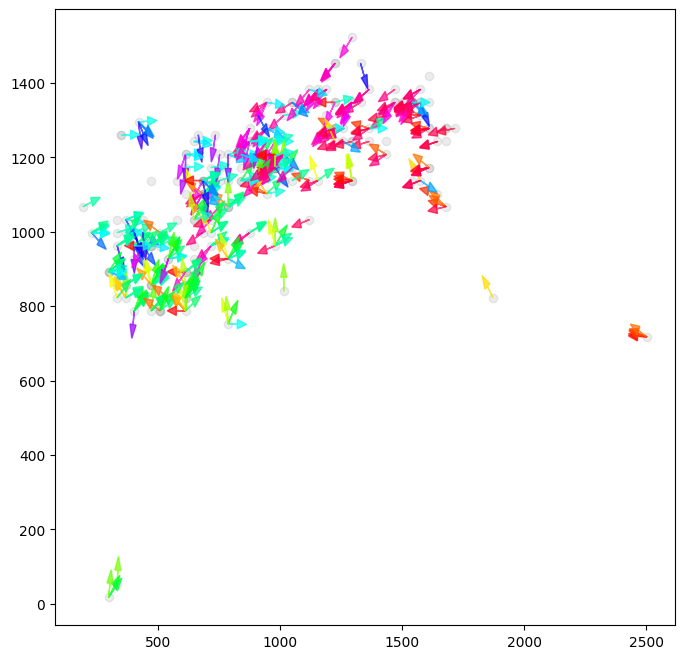

In [11]:
plot_vector_layout( sd, good_pairs)

In [20]:
def plot_raster_latency_pairs(sd, pairs, xlim=None, size=(16,6) ):
    latency_raster = []
    for pair in pairs:
        latency_raster.append( latency_times( pair[0], pair[1], sd, ms_cutoff_high=15, positive_only=False) )
    sd_latency = SpikeData(latency_raster)
    plot_raster( sd_latency, xlim=xlim, size=size )


In [12]:
from matplotlib import pyplot as plt
from matplotlib.patches import FancyArrow
from sklearn import preprocessing
import numpy as np
from human_hip.spike_data import latencies, latency_times, plot_raster, plot_footprint, cross_sttc
from braingeneers.analysis.analysis import SpikeData
import warnings
import diptest 
import math
import matplotlib.cm as cm
from ipywidgets import interact_manual



# The function creates  plot of arrows show the direction that information is flowing out of neurons
def plot_vector_layout( sd, pairs, normalize=True, arrow_length=75, min_dist=0, image_path=None, xlim=None ):
    """
    Inputs:
        pairs: np.array of neuron indices (as pairs) for which a connection exists, ex: [[0,1], [0,2], [2,3]]
        lags: np.array of the average lag time in ms corresponding to the neuron pairs, ex: [1, 3, -4]
        normalize: boolean, if True, all arrows will be the same length, if False, arrows will point to the ending neuron
        arrow_length: integer of how long the arrows should be drawn on the final plot
    Outputs:
        A plot depicting th 2D locations of neurons, with arrows showing the direction of information flow
    """
    # Get the x/y locations of the start and end neurons of each pair
    neuron_xy = []
    for neuron in sd.neuron_data[0].values():
        neuron_xy.append( [neuron['position'][0], neuron['position'][1]] )
    neuron_xy = np.array(neuron_xy)

    # Plot original scatter
    plt.figure(figsize=(8, 8))
    if image_path is not None:
        img = plt.imread(image_path)      # Load in image
        plt.imshow(img,  extent=[0, 3850, 0, 2100]) 
    plt.scatter( neuron_xy[:,0], neuron_xy[:,1], alpha=0.15, c='grey')
    plt.xlim( xlim )    

    # make pairs point in same direction
    pairs = pairs                         # make a copy of pairs, this avoids some bug
    for i in range(len(pairs)):
        lag = np.median(latencies( pairs[i][0], pairs[i][1], sd, ms_cutoff_high=20))
        if lag<0:
            pairs[i] = [ pairs[i][1], pairs[i][0] ]

    # Creat arrows show angle of information flow from a neuron
    starts = neuron_xy[ pairs[:,0] ]  # Get the x/y locations of the start and end neurons of each pair
    ends = neuron_xy[ pairs[:,1] ]
    centered = ends-starts   # Get the directions of arrows, then make of of them the same length
    normalized = preprocessing.normalize(centered) * arrow_length if normalize else centered # make same lengths, unless told otherwise
    
    # Draw Arrows
    cmap = cm.get_cmap('hsv')
    for i in range(len(starts)):
        if math.dist(starts[i], ends[i]) < min_dist:
            continue
        angle = (math.atan2(-(ends[i][1]-starts[i][1]), ends[i][0]-starts[i][0]) + np.pi) / (2 * np.pi)
        arrow = FancyArrow( 
                starts[i][0], starts[i][1], normalized[i][0], normalized[i][1], length_includes_head=True, head_width=25,
                linewidth=1, color=cmap(angle), alpha=0.7 ) #color="red"
        plt.gca().add_patch(arrow)


/tmp/ipykernel_24052/2995960396.py:28: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():
/tmp/ipykernel_24052/2995960396.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')


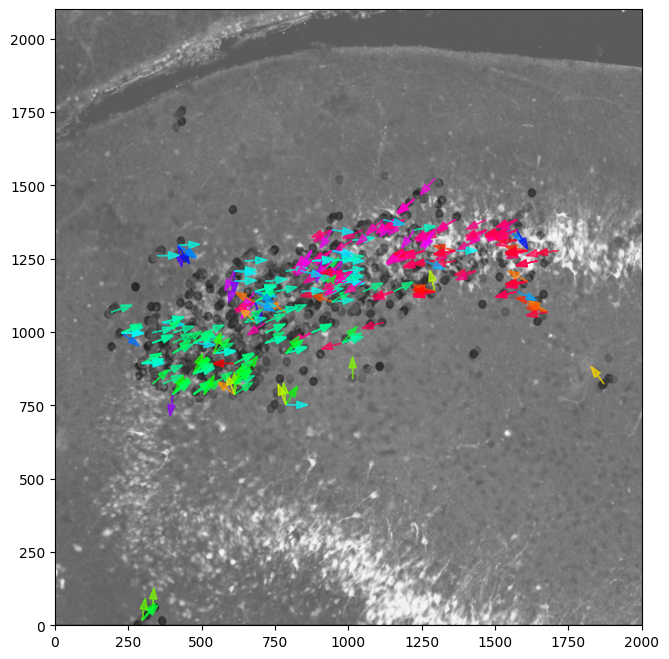

In [16]:
plot_vector_layout( sd, good_pairs, min_dist=300, xlim=(0,2000), image_path="/workspaces/human_hippocampus/data/histology/hc112823_bw.jpeg" )

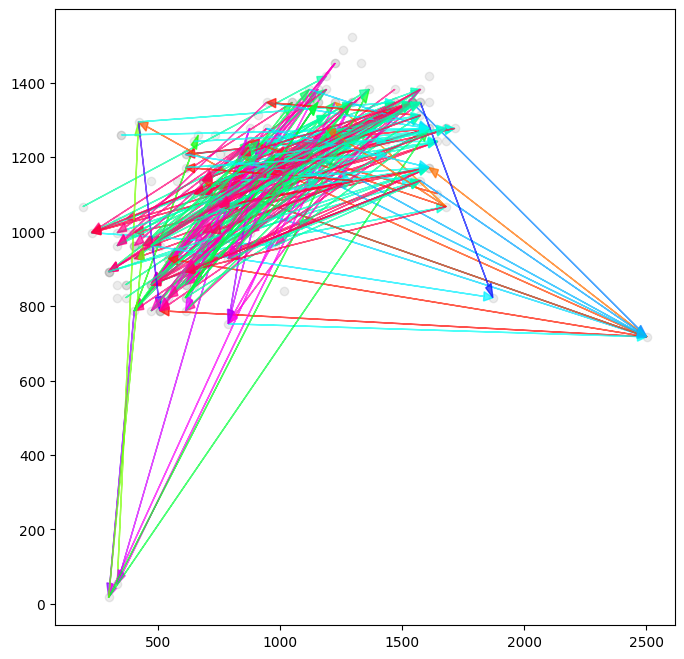

In [13]:
plot_vector_layout( sd, good_pairs, min_dist=500, normalize=False )

# Make Animations

In [15]:
animate_latencies(plot_vector=True, ms_range=range(0,1000) )

<function human_hip.animate.animate_latency_pairs.animate_latencies(sd, pairs, movie_range_ms=None, frame_interval_ms=500, directed=True, directed_backwards=False, filename='latencies.mp4', latency_ms_cutoff_low=1, latency_ms_cutoff_high=15, plot_vector=False, min_dist=0)>

25781 latency events occured in total spikedata
Making animation of 3.008 minutes
Saved animation to media/latencies.mp4


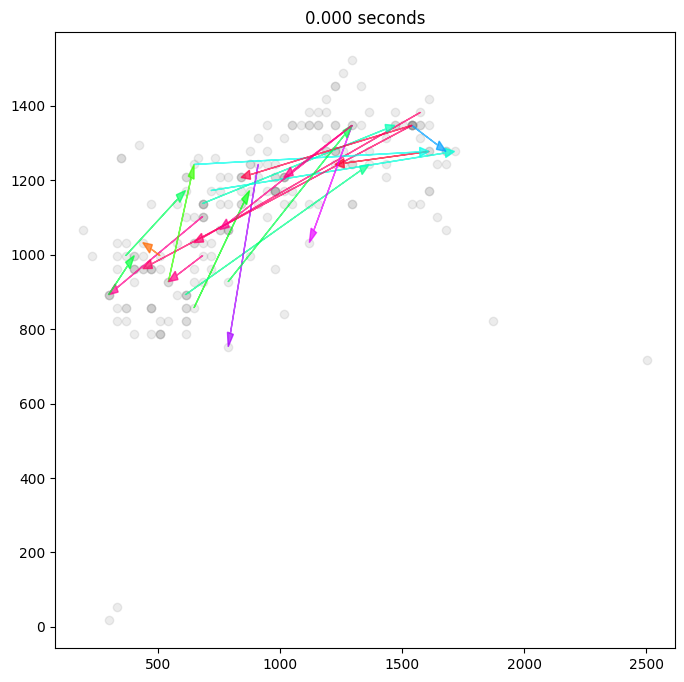

In [14]:
animate_latencies(sd, good_pairs, filename="media/latencies.mp4" )

1860 latency events occured in total spikedata
668 latency events occured above 500 um distance
Making animation of 2.283 minutes
Saved animation to media/latencies_mindist500.mp4


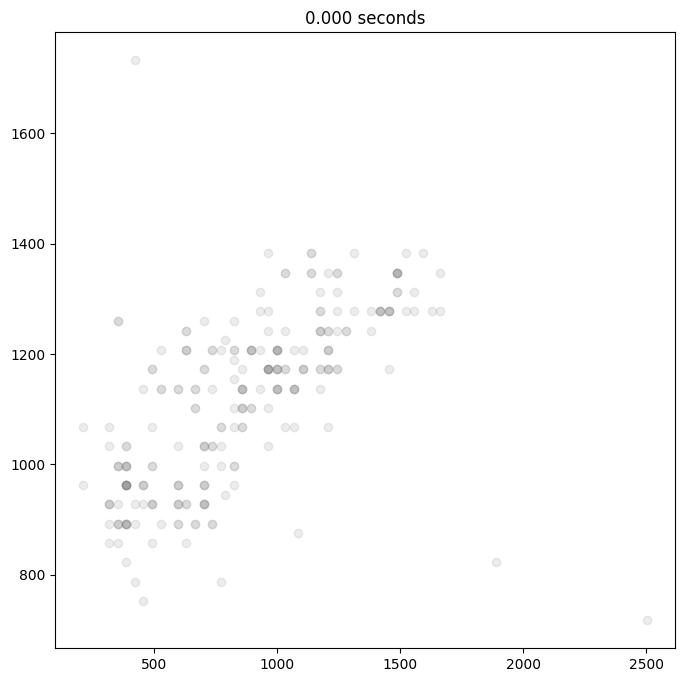

In [13]:
animate_latencies(sd, good_pairs,  filename='media/latencies_mindist500.mp4', min_dist=500 )

In [ ]:
# animate_latencies(sd, pairs, movie_range_ms=None, frame_interval_ms=500, directed=True, filename="latencies.mp4",
#                       latency_ms_cutoff_low=0, latency_ms_cutoff_high=15 ):